# "Cereal Analysis Based On Ratings By Using Mechine Learning Techniques"

# "Import Necessary Libraries"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [ ]:
df=pd.read_csv("/content/archive (1).zip")

In [ ]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [ ]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
df.shape

(77, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


# **Handling Missing Values**

In [ ]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
df.isnull().any()

name        False
mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass      False
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

In [ ]:
df.duplicated().any()

False

In [ ]:
for i in df:
    print(df[i].unique())

['100% Bran' '100% Natural Bran' 'All-Bran' 'All-Bran with Extra Fiber'
 'Almond Delight' 'Apple Cinnamon Cheerios' 'Apple Jacks' 'Basic 4'
 'Bran Chex' 'Bran Flakes' "Cap'n'Crunch" 'Cheerios'
 'Cinnamon Toast Crunch' 'Clusters' 'Cocoa Puffs' 'Corn Chex'
 'Corn Flakes' 'Corn Pops' 'Count Chocula' "Cracklin' Oat Bran"
 'Cream of Wheat (Quick)' 'Crispix' 'Crispy Wheat & Raisins' 'Double Chex'
 'Froot Loops' 'Frosted Flakes' 'Frosted Mini-Wheats'
 'Fruit & Fibre Dates; Walnuts; and Oats' 'Fruitful Bran' 'Fruity Pebbles'
 'Golden Crisp' 'Golden Grahams' 'Grape Nuts Flakes' 'Grape-Nuts'
 'Great Grains Pecan' 'Honey Graham Ohs' 'Honey Nut Cheerios' 'Honey-comb'
 'Just Right Crunchy  Nuggets' 'Just Right Fruit & Nut' 'Kix' 'Life'
 'Lucky Charms' 'Maypo' 'Muesli Raisins; Dates; & Almonds'
 'Muesli Raisins; Peaches; & Pecans' 'Mueslix Crispy Blend'
 'Multi-Grain Cheerios' 'Nut&Honey Crunch' 'Nutri-Grain Almond-Raisin'
 'Nutri-grain Wheat' 'Oatmeal Raisin Crisp' 'Post Nat. Raisin Bran'
 'Product

In [ ]:
df.drop(["name"], axis =1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["mfr"] = le.fit_transform(df["mfr"])
df["type"] = le.fit_transform(df["type"])

In [ ]:
df

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,3,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,5,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,2,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,6,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,1,0,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,6,0,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,1,0,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
print(df["mfr"].unique())

[3 5 2 6 1 4 0]


In [ ]:
print(df["type"].unique())

[0 1]


# "Heatmap"

<Axes: >

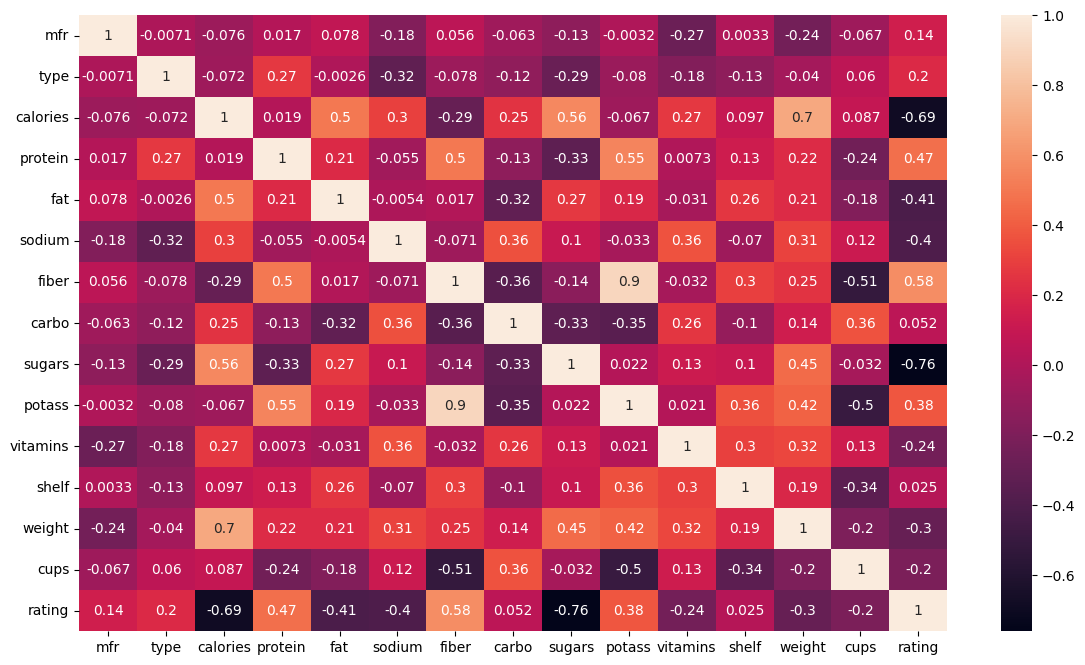

In [ ]:
plt.figure(figsize = (14, 8))
sns.heatmap(df.corr(), annot=True)

# "Data Visualisation"

In [ ]:
df.corr()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,1.000000,-0.007103,-0.076328,0.017059,0.077661,-0.175791,0.056159,-0.063045,-0.132900,-0.003241,-0.274766,0.003323,-0.240092,-0.066967,0.140942
type,-0.007103,1.000000,-0.071596,0.269265,-0.002615,-0.321552,-0.078114,-0.123023,-0.285219,-0.079825,-0.180633,-0.131730,-0.039880,0.060057,0.203024
calories,-0.076328,-0.071596,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.017059,0.269265,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.077661,-0.002615,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,-0.175791,-0.321552,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,0.056159,-0.078114,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,-0.063045,-0.123023,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,-0.132900,-0.285219,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.003241,-0.079825,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165


# **"BoxPlot"**

<Axes: xlabel='mfr', ylabel='rating'>

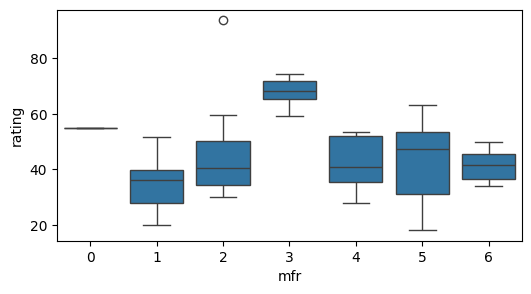

In [ ]:
plt.figure(figsize = (6, 3))
sns.boxplot(data = df, x = "mfr", y = "rating")

# "PairPlot"

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

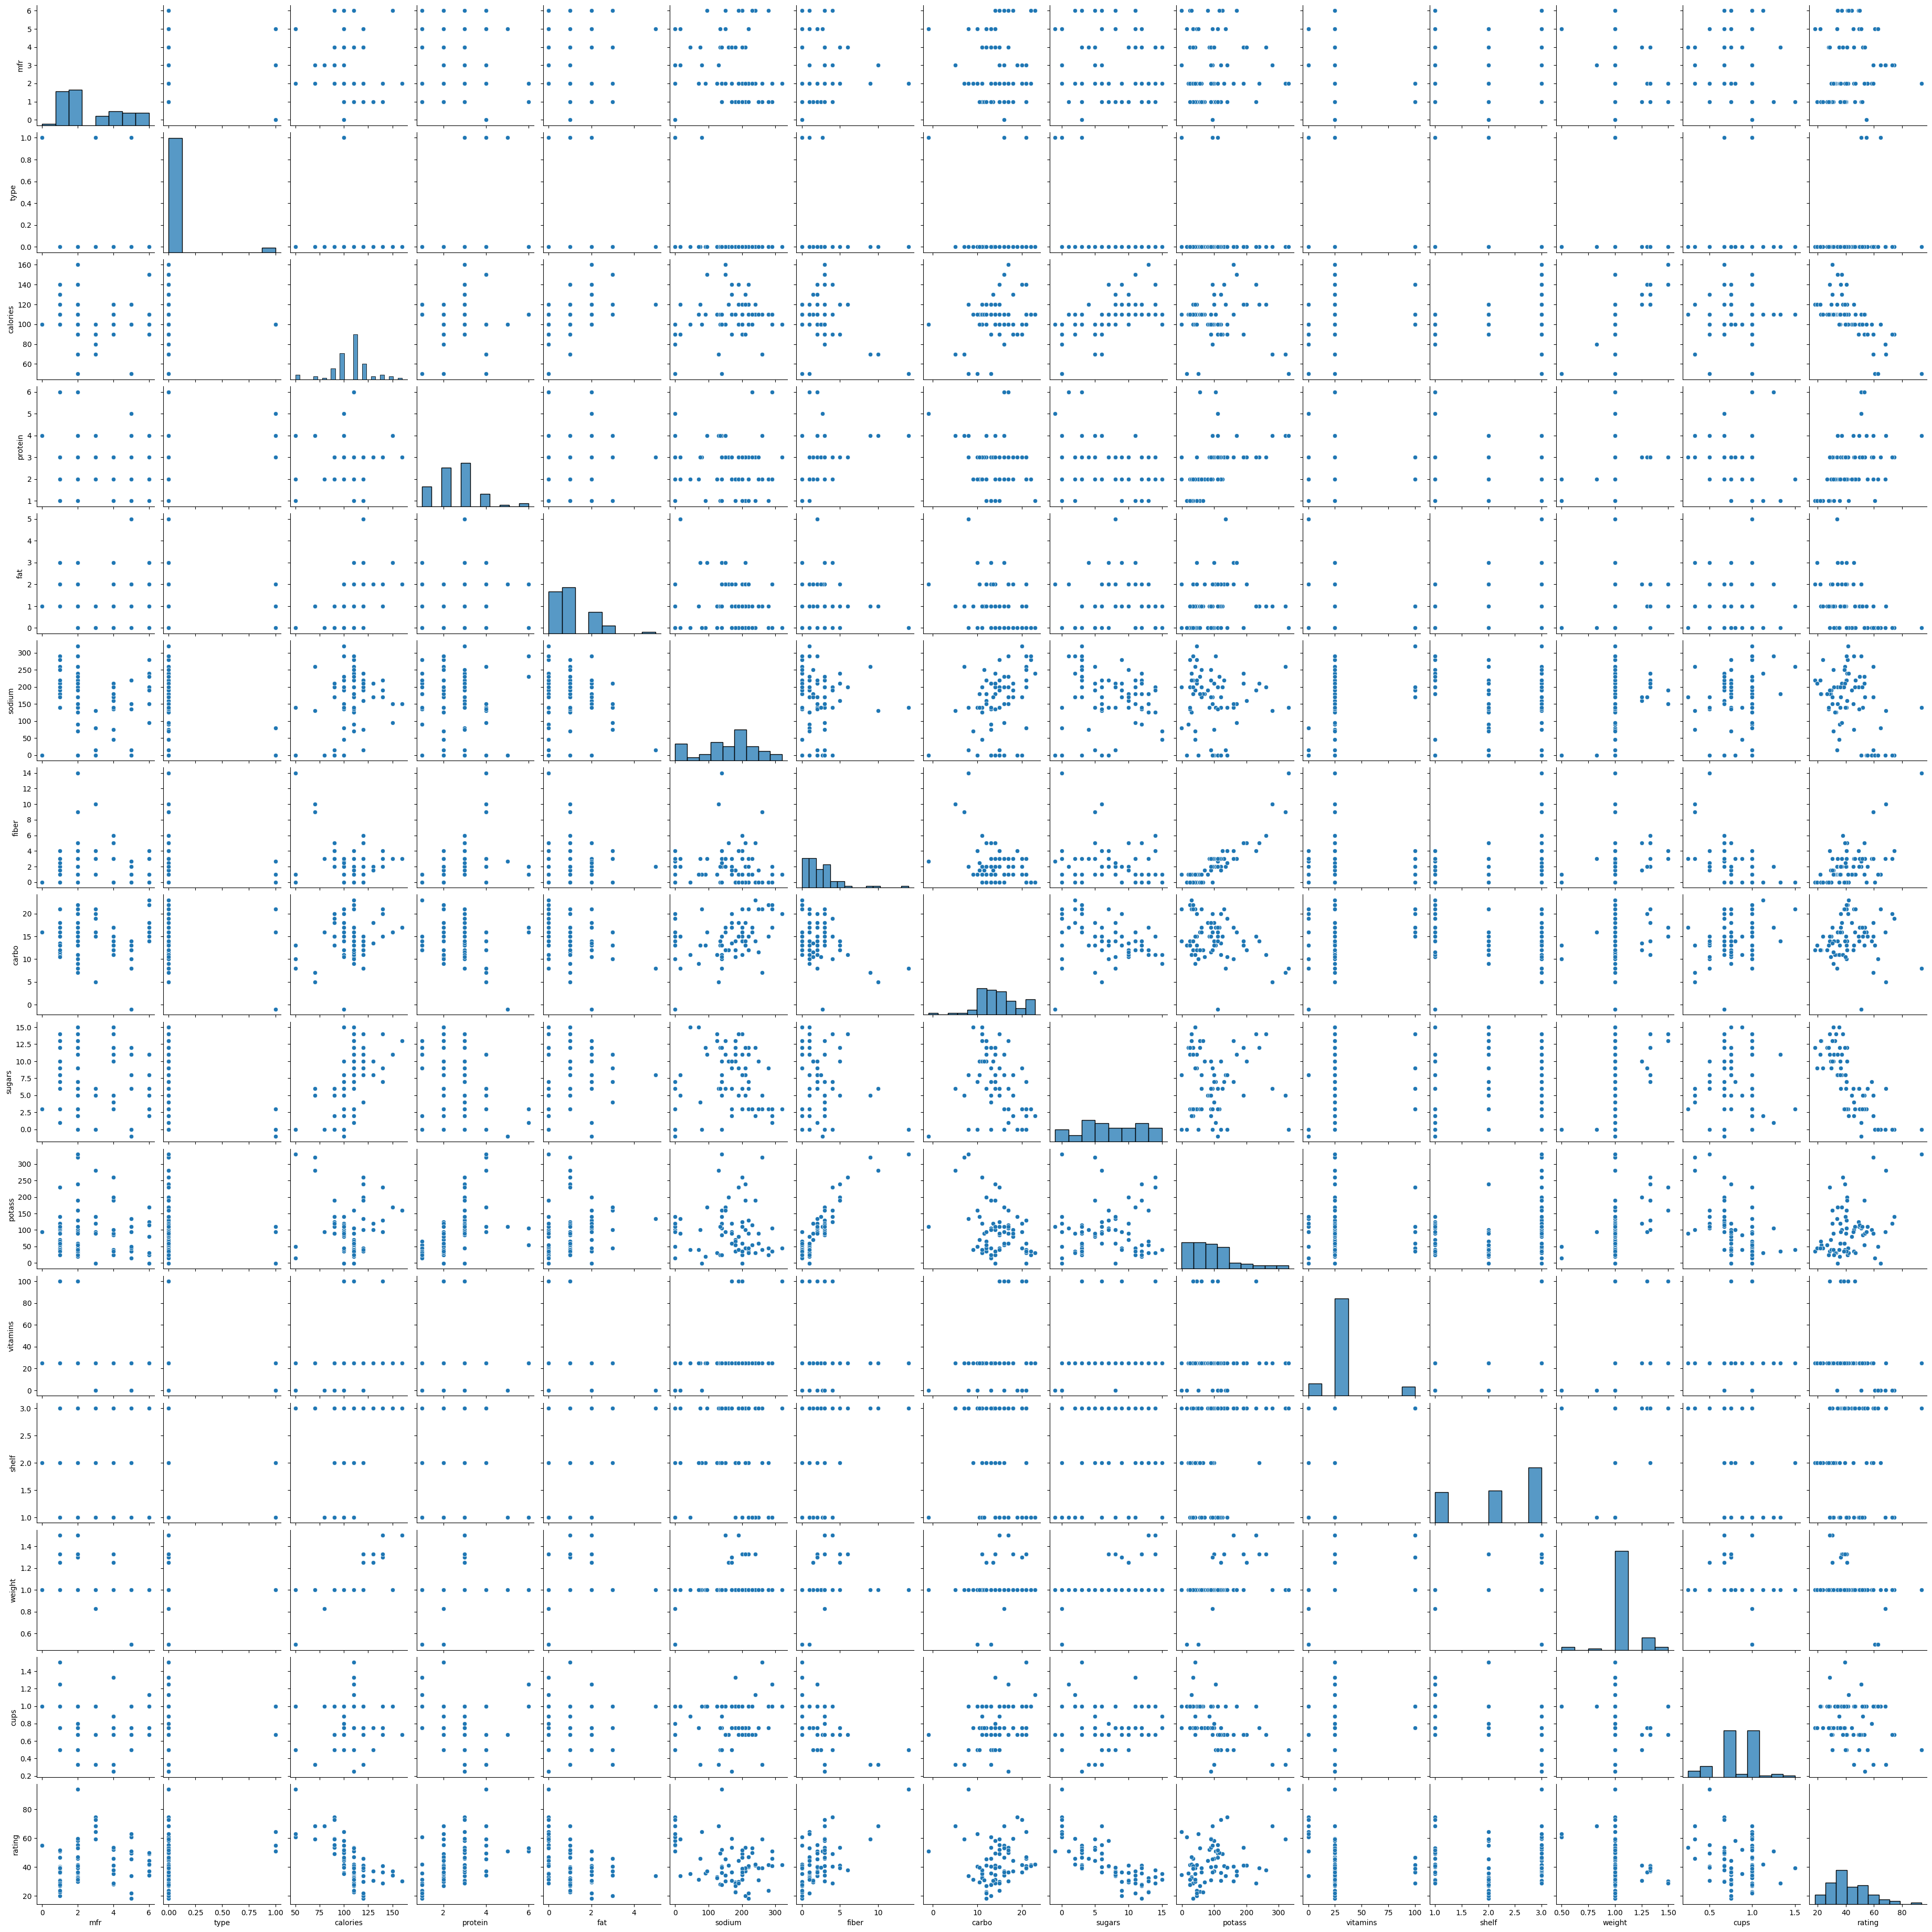

In [ ]:
sns.pairplot(data=df, markers=["^","v"], palette="inferno")

# "Label Encoding"

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns and apply Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
# Display the first few rows of the transformed dataset
print(df.head())


   mfr  type  calories  protein  fat  sodium  fiber  carbo  sugars  potass  \
0    3     0        70        4    1     130   10.0    5.0       6     280   
1    5     0       120        3    5      15    2.0    8.0       8     135   
2    2     0        70        4    1     260    9.0    7.0       5     320   
3    2     0        50        4    0     140   14.0    8.0       0     330   
4    6     0       110        2    2     200    1.0   14.0       8      -1   

   vitamins  shelf  weight  cups     rating  
0        25      3     1.0  0.33  68.402973  
1         0      3     1.0  1.00  33.983679  
2        25      3     1.0  0.33  59.425505  
3        25      3     1.0  0.50  93.704912  
4        25      3     1.0  0.75  34.384843  


# "Splitting The Dataset Into Dependent And Independent Variable"


In [ ]:
x= df.iloc[:,0:14].values
y= df.iloc[:,14:15].values


In [ ]:
x

array([[  3.  ,   0.  ,  70.  , ...,   3.  ,   1.  ,   0.33],
       [  5.  ,   0.  , 120.  , ...,   3.  ,   1.  ,   1.  ],
       [  2.  ,   0.  ,  70.  , ...,   3.  ,   1.  ,   0.33],
       ...,
       [  6.  ,   0.  , 100.  , ...,   1.  ,   1.  ,   0.67],
       [  1.  ,   0.  , 100.  , ...,   1.  ,   1.  ,   1.  ],
       [  1.  ,   0.  , 110.  , ...,   1.  ,   1.  ,   0.75]])

In [ ]:
x.shape

(77, 14)

In [ ]:
y

array([[68.402973],
       [33.983679],
       [59.425505],
       [93.704912],
       [34.384843],
       [29.509541],
       [33.174094],
       [37.038562],
       [49.120253],
       [53.313813],
       [18.042851],
       [50.764999],
       [19.823573],
       [40.400208],
       [22.736446],
       [41.445019],
       [45.863324],
       [35.782791],
       [22.396513],
       [40.448772],
       [64.533816],
       [46.895644],
       [36.176196],
       [44.330856],
       [32.207582],
       [31.435973],
       [58.345141],
       [40.917047],
       [41.015492],
       [28.025765],
       [35.252444],
       [23.804043],
       [52.076897],
       [53.371007],
       [45.811716],
       [21.871292],
       [31.072217],
       [28.742414],
       [36.523683],
       [36.471512],
       [39.241114],
       [45.328074],
       [26.734515],
       [54.850917],
       [37.136863],
       [34.139765],
       [30.313351],
       [40.105965],
       [29.924285],
       [40.69232 ],


# "OneHot Encoding"

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a = one.fit_transform(x[:,0:1]).toarray()
x = np.delete(x,[0],axis=1)
x=np.concatenate((a,x),axis=1)

In [ ]:
x.shape

(77, 20)

# "Splitting The Data Into Train And Test"

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


# MODEL BUILDING#

# **LINEAR REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(x_test)

In [ ]:
lr_pred

array([[29.92428517],
       [49.78744507],
       [39.70339959],
       [60.75611161],
       [45.81171618],
       [58.3451415 ],
       [59.36399361],
       [53.37100755],
       [34.13976435],
       [38.8397453 ],
       [40.91704712],
       [55.33314186],
       [93.70491267],
       [26.73451534],
       [54.85091689],
       [37.03856175]])

In [ ]:
y_test

array([[29.924285],
       [49.787445],
       [39.7034  ],
       [60.756112],
       [45.811716],
       [58.345141],
       [59.363993],
       [53.371007],
       [34.139765],
       [38.839746],
       [40.917047],
       [55.333142],
       [93.704912],
       [26.734515],
       [54.850917],
       [37.038562]])

# **R2_SCORE MODEL**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_pred)

0.9999999999999992

In [ ]:
y_p = lr.predict([[0,0,0,0,1,0,0,0,70,4,1,130,10,5,6,280,25,3,1,0.33]])

In [ ]:
y_p

array([[68.40297324]])

In [ ]:
import pickle
pickle.dump(lr,open("cerealanalysis.pkl" , "wb"))